<a href="https://colab.research.google.com/github/Daniel-Fernandez-951/DS-Unit-1-Sprint-2-Statistics/blob/master/Daniel_Fernandez_DS20_DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

*Updated July 17, 2020*

In this sprint challenge you will look at a dataset of echocardiogram data and other health measures of individuals who have suffered heart attacks using the following dataset:

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. **survival** -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. **still-alive** -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. **age-at-heart-attack** -- age in years when heart attack occurred
4. **pericardial-effusion** -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. **fractional-shortening** -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. **epss** -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. **lvdd** -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. **wall-motion-score** -- a measure of how the segments of the left ventricle are moving
9. **wall-motion-index** -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. **mult** -- a derivate var which can be ignored
11. **name** -- the name of the patient (I have replaced them with "name")
12. **group** -- meaningless, ignore it
13. **alive-at-1** -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.

- There is an anomaly with row 50 of the data (index position 49). It does not have enough columns. Please include `skiprows=[49]` in your `read_csv()` function call. You must indicate specific rows to be skipped as a list or else `read_csv()` will skip all rows up to and including the row to be skipped. 

- Your dataset should initially have 131 rows and 13 columns

- Use the attribute information listed above to name your column headers.

- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes the missing value indicators as NaN.

- The `name` column has been altered to only include the string 'name' to protect the privacy of patients. The `group` column is also meaningless. Please drop both of these columns, you will then have 11 columns usable data.


In [165]:
import pandas as pd
import numpy as np
from scipy import stats
columns = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion',
           'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index',
           'mult', 'name', 'group', 'alive-at-1']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data', names=columns, skiprows=[49])
df = df.drop(columns=['name', 'group'], axis='columns')
print(df.shape)
df = df.replace("?", np.NaN)
df.head(10)
df[['fractional-shortening', 'epss', 'survival', 'age-at-heart-attack', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult']] = df[['fractional-shortening', 'epss', 'survival', 'age-at-heart-attack', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult']].astype(float)
df['alive-at-1'] = df['alive-at-1'].astype(float)

(131, 11)


## Part 2 - Exploring data, Testing hypotheses

### Explore the Data

Explore the data: you can use whatever approach (tables, Pandas EDA functions, visualizations, etc.) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand which variables are numeric and which are categorical -in order to identify columns that might be suitable for t-tests, chi^2 tests and the building of confidence intervals. 

When exploring the categorical data it may be helpful to create use crosstabs aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table) in order to compare the relationships between categorical variables.

It will also be helpful to keep an eye out for variables that you could use to split the data into two different samples for conducting two-sample t-tests.

Remember, numeric variables can still be categorical if they are represented using discrete (countable e.g. - just a few) values.

---

### Hypothesis Tests

Once you feel like you have a good handle on the types of variables in the dataset, please conduct at least:

- Two 1-sample t-tests
- Two 2-sample t-tests
- Two chi^2 tests

For each test please write out your: 
- null hypothesis
- alternative hypothesis
- confidence level
- conclusion

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end.


### Exploratory Data Analysis

In [ ]:
df.info()

In [ ]:
df.head(10)

### One-Sample T-tests

In [168]:
# FIRST
# T-TEST 1-SAMPLE

# H-null: Average age of HA is not 55
# H-alt: Average age of HA is 55
# Confidence level at 95%
df1_tt1 = df.dropna()
stats.ttest_1samp(df1_tt1['age-at-heart-attack'], 55)

# Successful in rejecting the null hypothesis (H-null) due to the p-value equating
# below 0.05 @ 6.4765 e -12; thus it is more safe to assume the alternative 
# hypothesis that the average age for a HA is around 55.

Ttest_1sampResult(statistic=8.516516631325539, pvalue=6.476502607331888e-12)

In [169]:
# SECOND
# T-TEST 1-SAMPLE

# H-null: Average fractional shortening is not 0.280
# H-alt: Average fractional shortening is 0.280
# Confidence level at 95%
df2_tt1 = df.dropna()
stats.ttest_1samp(df2_tt1['fractional-shortening'], 0.280)

# Sucessful in rejecting the null hypothesis due to the p-value falling below
# 0.05 @ 3.4518 e -05; thus is it more safe to assume the alternative
# hypothesis that the average FS is around 0.280

Ttest_1sampResult(statistic=-4.476660114801637, pvalue=3.4518235307137975e-05)

### Two-Sample T-tests

In [199]:
# FIRST
# T-TEST 2-SAMPLE

# H-null: Age has no impact on fractional shortening.
# H-alt: Age does impact fractional shortening.
# Confidence Interval = 95%

stats.ttest_ind(df['age-at-heart-attack'], df['fractional-shortening'], nan_policy='omit')


# Conclusion: Based on the data set used; successful in rejecting the null
# hypothesis due to a small p-value below 95% CI limit. With a p-value of 
# 1.267 e -183 it is evident that age has a substancial impact on fractional
# shortening amoung the population.

Ttest_indResult(statistic=83.54856369837613, pvalue=1.267224491422304e-183)

In [206]:
# SECOND
# T-TEST 2-SAMPLE

# H-null: Survival of HA is not correlated to age at HA.
# H-alt: Survival of HA is coreelated to the age at HA.
# Confidence Interval = 95%

stats.ttest_ind(df['age-at-heart-attack'], df['survival'], nan_policy='omit')

# Conclusion: Rejected null hypothesis due to a p-value (4.16 e -72) below CI=95%; thus,
# it could be safe to consider age at HA as an important metric for understanding surviability.

Ttest_indResult(statistic=25.53730724065949, pvalue=4.1599315713832017e-72)

### Chi^2 T-tests

In [ ]:
df.head(30)

In [173]:
from scipy.stats import chi2_contingency

In [174]:
pd.crosstab(df['still-alive'], df['pericardial-effusion'], normalize='index')


pericardial-effusion,0,1
still-alive,,
0,0.863636,0.136364
1,0.720930,0.279070


In [175]:
# FIRST
# CHI-2 TEST

# H-null: Precardial effusion does not influence mortality
# H-alt:  Precardial effusion does influence mortality
# Confidence Interval = 95%
g, p, dof, expected = chi2_contingency(pd.crosstab(df['still-alive'], df['pericardial-effusion'], normalize='index'))
print(p)
# Conclusion: Failed to reject null hypothesis; p-value exceeds 0.05 for a
# 95% confidence interval.

0.1350963586157063


In [176]:
pd.crosstab(df['alive-at-1'], df['pericardial-effusion'], normalize='index')*100

pericardial-effusion,0,1
alive-at-1,,
0.0,86.000000,14.000000
1.0,66.666667,33.333333


In [177]:
# SECOND
# CHI-2 TEST

# H-null: Precardial effusion does not effect within a year
# H-alt: Precardial effusion does effect within a year
# Confidence Interval = 95%

g, p, dof, expected = chi2_contingency(pd.crosstab(df['alive-at-1'], df['pericardial-effusion'], normalize='index'))
print(p)

# Conclusion: Failed to reject the null hypothesis due to the p-value exceeding
# 95% confidence interval; mortality after a year may not be influenced by precardial effusion.




0.17959505707221374


## Part 3 - Confidence Intervals

- Pick two of the samples that you used above in your t-tests and please find a 95% confidence interval around their sample means in order to communicate the level of precision with which we are able to estimate them.

- Please plot both 95% confidence intervals to display them visually. You may choose any suitable the plotting method.


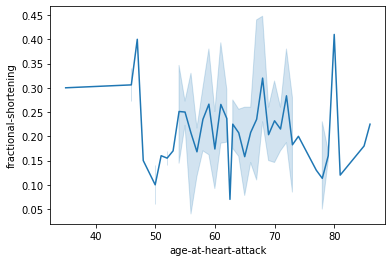

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=df['age-at-heart-attack'], y=df['fractional-shortening'], ci=95, err_style="band");

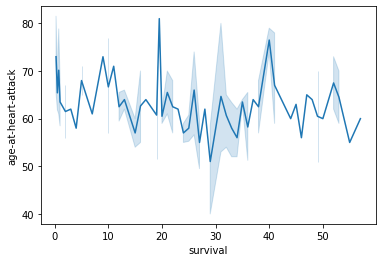

In [221]:
sns.lineplot(y=df['age-at-heart-attack'], x=df['survival'], ci=95, err_style='band');

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics - IN YOUR OWN WORDS, DO NOT PLAGIARIZE- and then compare and contrast these two approaches to statistical inference.



### YOUR ANSWER HERE

Frequentist approach uses a less computationally intensive process that reduces computational cost by holding some parapeters fixed. Inversly, a bayesian approach describes parameters probablistcally; requiring more calculations for analysis. A frequentist approach could be more sutable for hypothesis testing while a bayseian approach has a better fit in estimation of a population to describe an unknown aspect. 

# Stretch Goals: 
Do these to get a 3 on the corresponding sections. These are **not** required in order to pass the Sprint Challenge.

## Part 1: 

In order to get a 3 on this section make sure that you do not miss any of the specified data loading tasks, also, make sure that your work **throughout the entire sprint challenge** is particularly well commented, easy to follow, and thorough. 

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. 

## Part 3: 

Plot you confidence intervals using all three plotting methods that were demonstrated in class.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an exceptional grasp of these high level concepts.

In [ ]:
# YOUR CODE HERE - Feel free to add as many code and text cells as necessary